In [130]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
%matplotlib inline

In [131]:
# loadinf data
data_dir1 = "data\ex1data1.txt"
data1 = np.loadtxt(data_dir1 ,delimiter=',', unpack = True)
X = np.array(data1[:-1]).T
y = np.array(data1[-1:]).T
X = np.insert(X, 0,1,axis=1)

In [132]:
def compute_cost(X, y, theta):
    """
    computing the cost function
    X - input data, with a column of 1 
    y - input target
    returns the cost function's value
    """
    m = len(y)
    y_hat =  X @ theta
    cost = ((y_hat-y).T @ (y_hat-y) / (2*m)).item()
    return cost

def feature_normalize(X):
    """
    normalizes data to be ~ N(0,1)
    
    """
    normalize = lambda vec: (vec-np.mean(vec))/np.std(vec)
    for i in np.arange(X.shape[1]-1)+1:
        X[:,i] = normalize(X[:,i])

In [133]:
class LinearRegression():
    """ 
    This class is made for training a model of linear regression
    """
    def __init__(self):
        """
        The constractor of the LinearRegression object
        """
        
    def fit(self, X, y,iterations = 1500, learning_rate = 0.01, save_cost = False,
            save_theta = False, normalize_data = True):
        """
        Trains the Linear-Regression model.
        the model's weights are optimized using batch gradient descent
        X - the input data
        y - target (expected output for the data)
        iterations - number of gradient descent iterations, defaulted to be 1500
        learning_rate -  defaulted to be 0.01
        save_cost - if True, fit will return a list of the cost-function's values
        save_theta - if True, fit will return a list of theta's values
        """
        if normalize_data:
            feature_normalize(X)
        
        self.theta = np.zeros((X.shape[1],1))
        m = len(y)
        cost_list = []
        theta_list = []
            
        for i in range(iterations):
            # documenting the values of theta and the cost-function
            if save_cost:
                cost_list.append(compute_cost(X, y, self.theta))
            if save_theta:
                theta_list.append(np.copy(self.theta))
                
            y_hat =  X @ self.theta
            step =  (y_hat - y).T @ X / m
            self.theta -= learning_rate * step.T
                                
        return {"cost":cost_list, "theta":theta_list}
               
    def fit_with_normal_eq(self, X, y):
        """
        Solves the linear regression problem with a closed formula of normal equation
        X - input data
        y - target
        returns theta, when it contains [theta_0,theta_1]
        """
        # used pseudo-inverse for stability
        self.theta = np.linalg.pinv(X.T@X) @ X.T @ y
        return self.theta
        
    def predict(self, X):
        """
        X - input data
        returns a prediction using the linear model
        """
        y_hat = X @ self.theta 
        return y_hat   

In [134]:
def plot_model(X, y, theta):
    """
    Works only for 1-d data
    visualizes a trained regression model, while plotting the data as well
    X - the input data
    y - target (expected output for the data)
    theta - weights of the linear regression
    """
    plt.scatter(X[:,-1],y,marker = "3")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("fitted model")
    plt.grid()
    t = np.linspace(np.min(X[:,-1]), np.max(X[:,-1]), 10000)
    line = theta[0] + t*theta[1]
    plt.plot(t,line,'r')
    plt.show()

def visualize_optimization(X, y, doc_dict, f):
    """
    Works only for 1-d data
    creates a 3-d surface plot for the given cost-function
    X - the input data
    y - target (expected output for the data)
    doc_dict - doc-dictionary, output of the fit function in LinearRegression class
    f - function that computes the wanted cost funtion
    """    
    fig = plt.figure(figsize=(12,12))
    ax = fig.gca(projection='3d')

    theta0s = np.arange(-10,10,.5)
    theta1s = np.arange(-1,8,.5)
    th0, th1, cost = [], [], []
    for theta0 in theta0s:
        for theta1 in theta1s:
            th0.append(theta0)
            th1.append(theta1)
            tmp_theta = np.array([[theta0], [theta1]])
            cost.append(f(X,y,tmp_theta))

    ax.scatter(th0,th1,cost,c=np.abs(cost))
    plt.xlabel(r'$\theta_0$',fontsize=30)
    plt.ylabel(r'$\theta_1$',fontsize=30)
    plt.title('Cost',fontsize=20)
    
    theta_hist = doc_dict["theta"]
    cost_hist = doc_dict["cost"]
    ax.plot([x[0] for x in theta_hist],[x[1] for x in theta_hist], cost_hist ,'ro-')
    plt.show()

In [135]:
# lets train a model
lin_reg = LinearRegression()
doc = lin_reg.fit(X,y,save_cost = True, save_theta = True)

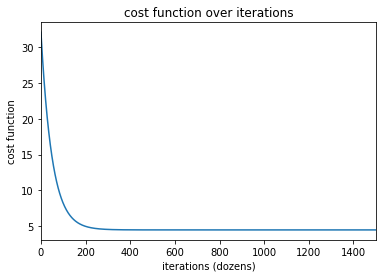

In [136]:
# plotting the cost-function over iterations
plt.plot(doc["cost"])
plt.xlabel("iterations (dozens)")
plt.ylabel("cost function")
plt.xlim((0,1500))
plt.title("cost function over iterations")
plt.show()

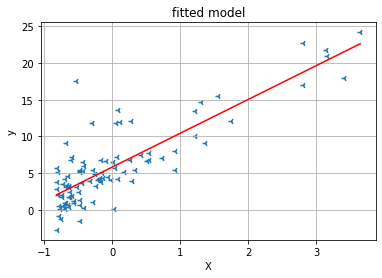

In [137]:
# graph of the fitted-model over the train data
plot_model(X, y, doc["theta"][-1])

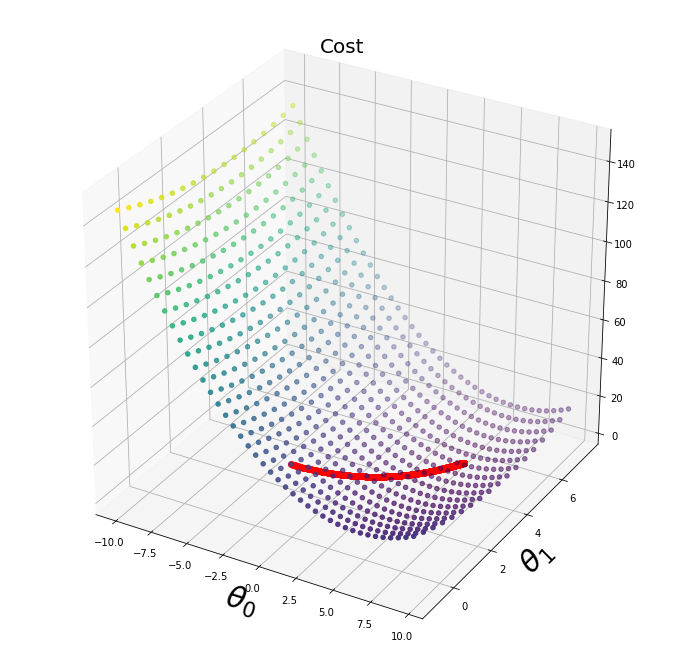

In [138]:
# visualizing the minimization path of the theta values
visualize_optimization(X,y,doc,f=compute_cost)

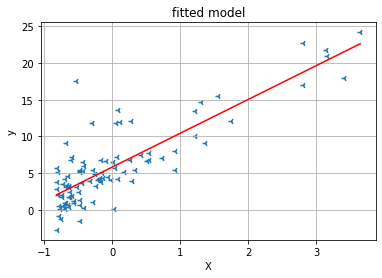

In [139]:
# using normal equation:
theta_norm_eq = lin_reg.fit_with_normal_eq(X,y)
plot_model(X,y, theta_norm_eq)